In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import plotly.express as px

In [7]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

/opt/homebrew/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [8]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(20)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,3,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1,2,2,3,3,3,3,3,3,2,3,3,3,1,2,1,2,1,3,3,1,2,1,2,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1,2,1,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,2,3,3,3,2,1,2,2,1,1,2,2,1,1,1,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,3,3,3,3,2,1,2,1,1,1,1,2,2,1,1,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,3,3,3,3,3,3,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,1,1,1,-99,1,-99,1,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,3,1,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,3,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2


In [9]:
questionaire_df.shape

(1420, 65)

Checking for null values.

In [10]:
questionaire_df.isna().sum() 

ID              0
everbev         0
everherb        0
evermed         0
oats            0
               ..
onlineforum     0
blog            0
websites        0
searchengine    0
app             0
Length: 65, dtype: int64

In [6]:
questionaire_df.columns

Index(['ID', 'everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

For our analysis, we are only selecting the galactagogues

In [21]:
food_items = ['ID','oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat']
food_items_df = pd.DataFrame(data = questionaire_df, columns = food_items)
food_items_df.head()

,ID,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat
0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1
3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,5,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1


# Exploratory Data Analysis

In [47]:
food_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1420 non-null   int64
 1   everbev         1420 non-null   int64
 2   everherb        1420 non-null   int64
 3   evermed         1420 non-null   int64
 4   oats            1420 non-null   int64
 5   lacttreathome   1420 non-null   int64
 6   lacttreatstore  1420 non-null   int64
 7   brewersyeast    1420 non-null   int64
 8   coconutdrink    1420 non-null   int64
 9   sportdrink      1420 non-null   int64
 10  pinkdrink       1420 non-null   int64
 11  noalcbeer       1420 non-null   int64
 12  beer            1420 non-null   int64
 13  wine            1420 non-null   int64
 14  lacttea         1420 non-null   int64
 15  fruit           1420 non-null   int64
 16  veg             1420 non-null   int64
 17  seeds           1420 non-null   int64
 18  beans           1420 non-nul

There are 1420 non null rows in the data set with all the columns having integer datatype.

Dropping the rows having -99 value as it signifies missing responses from the candidate.

In [48]:
food_items_df=food_items_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [49]:
food_items_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1348.0,703.273739,409.356476,1.0,346.75,700.5,1059.25,1420.0
everbev,1348.0,1.445104,0.497162,1.0,1.00,1.0,2.00,2.0
everherb,1348.0,1.859050,0.348099,1.0,2.00,2.0,2.00,2.0
evermed,1348.0,1.984421,0.123884,1.0,2.00,2.0,2.00,2.0
oats,1348.0,2.297478,0.859771,1.0,1.00,3.0,3.00,3.0
lacttreathome,1348.0,2.721068,0.583822,1.0,3.00,3.0,3.00,3.0
lacttreatstore,1348.0,2.677300,0.605975,1.0,3.00,3.0,3.00,3.0
brewersyeast,1348.0,2.790059,0.533640,1.0,3.00,3.0,3.00,3.0
coconutdrink,1348.0,2.765579,0.568880,1.0,3.00,3.0,3.00,3.0
sportdrink,1348.0,2.497033,0.777843,1.0,2.00,3.0,3.00,3.0


In [50]:
food_items_df['oats'].value_counts()

3.0    758
1.0    357
2.0    233
Name: oats, dtype: int64

In [51]:
food_items_df.iloc[:,1:].shape

(1348, 21)

Replacing with 1 with True while 2 and 3 with False

In [52]:
food_items_df = food_items_df.iloc[:,1:].replace({3: False,1: True, 2: False}, regex = True)

In [53]:
food_items_df.head(10)

,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,True,True,True,True,True,True,False,False,False,False,True,True,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,True,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
food_counts = []
for i in food_items_df.columns:
    food_counts.append((food_items_df[i] == True).sum())
#food_counts.sort(reverse = True)

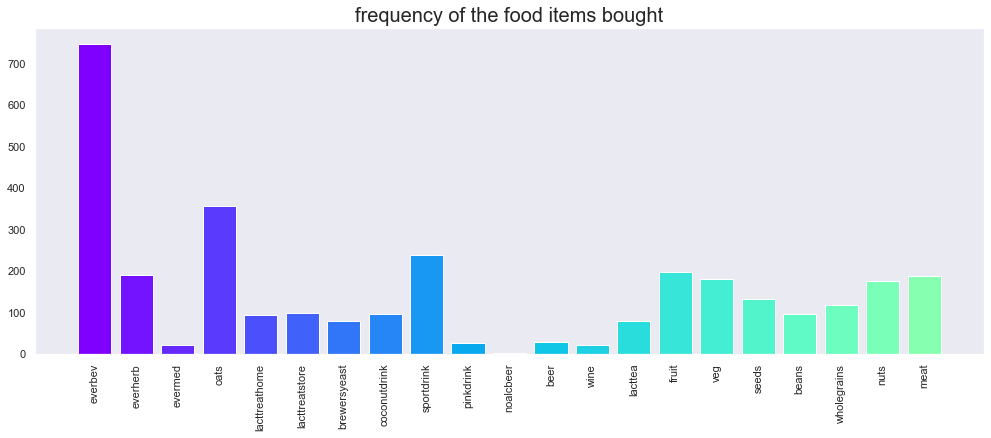

In [55]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(food_items_df.columns, food_counts,color = color)
plt.title('frequency of the food items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

__TERMINOLOGIES__

__Support__ : Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

__Confidence__ : Likelihood that customer will buy both products A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.
    
    Confidence(A => B) = Support(A, B)/Support(A)

__Lift__ : Increase in the sale of A when you sell B.

    Lift(A => B) = Confidence(A, B)/Support(B)

    Lift (A => B) = 1 means that there is no correlation within the itemset.

    Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
    
    Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Calculating the support for each of the galactagogues

In [56]:
#Calculate the support
support = food_items_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
everbev,0.554896
oats,0.264837
sportdrink,0.177300
fruit,0.146884
everherb,0.140950
meat,0.139466
veg,0.133531
nuts,0.130564
seeds,0.098665
wholegrains,0.087537


__Apriori Algorithm:__ refers to the algorithm which is used to calculate the association rules between objects. It means how two or more objects are related to one another. In other words, we can say that the apriori algorithm is an association rule leaning that analyzes that people who bought product A also bought product B.

Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

In [57]:
frequent_itemsets = apriori(food_items_df, min_support= 0.05, use_colnames=True, max_len = 3)
rules = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

In [58]:
display(rules.sort_values(by ='confidence', ascending=False).head(10))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
113,"(seeds, veg)",(everbev),0.054154,0.554896,0.054154,1.0,1.802139,0.024104,inf
51,"(oats, lacttreathome)",(everbev),0.060831,0.554896,0.060831,1.0,1.802139,0.027076,inf
1,(oats),(everbev),0.264837,0.554896,0.264837,1.0,1.802139,0.117880,inf
108,"(fruit, meat)",(everbev),0.106825,0.554896,0.106825,1.0,1.802139,0.047548,inf
102,"(fruit, nuts)",(everbev),0.086053,0.554896,0.086053,1.0,1.802139,0.038303,inf
99,"(wholegrains, fruit)",(everbev),0.062315,0.554896,0.062315,1.0,1.802139,0.027736,inf
96,"(fruit, beans)",(everbev),0.059347,0.554896,0.059347,1.0,1.802139,0.026416,inf
93,"(fruit, seeds)",(everbev),0.053412,0.554896,0.053412,1.0,1.802139,0.023774,inf
89,"(fruit, veg)",(everbev),0.108309,0.554896,0.108309,1.0,1.802139,0.048209,inf
87,"(sportdrink, meat)",(everbev),0.063798,0.554896,0.063798,1.0,1.802139,0.028397,inf


Rules identified:  226


In [59]:
rules_1 = association_rules(frequent_itemsets, metric="lift",  min_threshold = 3)

In [60]:
display(rules_1.sort_values(by ='lift', ascending=False).head(10))
print("Rules identified: ", len(rules_1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
190,"(veg, meat)",(beans),0.097923,0.071958,0.052671,0.537879,7.474852,0.045624,2.008221
191,(beans),"(veg, meat)",0.071958,0.097923,0.052671,0.731959,7.474852,0.045624,3.365442
150,(beans),"(fruit, veg)",0.071958,0.108309,0.054896,0.762887,7.043638,0.047102,3.760612
147,"(fruit, veg)",(beans),0.108309,0.071958,0.054896,0.506849,7.043638,0.047102,1.881862
146,"(fruit, beans)",(veg),0.059347,0.133531,0.054896,0.925000,6.927222,0.046971,11.552918
151,(veg),"(fruit, beans)",0.133531,0.059347,0.054896,0.411111,6.927222,0.046971,1.597335
171,"(fruit, meat)",(beans),0.106825,0.071958,0.051929,0.486111,6.755441,0.044242,1.805919
174,(beans),"(fruit, meat)",0.071958,0.106825,0.051929,0.721649,6.755441,0.044242,3.208814
189,"(beans, meat)",(veg),0.058605,0.133531,0.052671,0.898734,6.730520,0.044845,8.556380
192,(veg),"(beans, meat)",0.133531,0.058605,0.052671,0.394444,6.730520,0.044845,1.554597


Rules identified:  212


__Antecedent:__ refers to the items on the LEFT ie., the item which the customer buy.

__Consequent:__ refers to the items on the RIGHT ie., the item which the customer follows to buy.

In [61]:
fig = px.scatter_3d(rules, x='confidence', y='support', z='lift', opacity=0.7, color='antecedents')
                    #color='petal_length', symbol='species')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<>:24: DeprecationWarning:

invalid escape sequence \d

<>:24: DeprecationWarning:

invalid escape sequence \d

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_12096/2187697085.py:24: DeprecationWarning:

invalid escape sequence \d



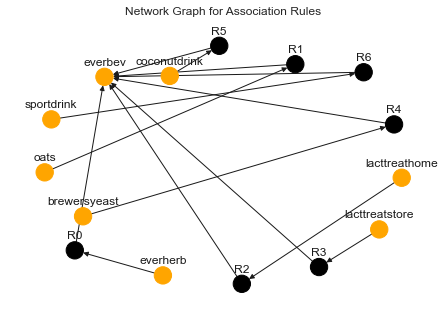

In [62]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 7)

__Inference:__

From the results it’s very clear that, higher the LIFT value, stronger the correlation between the antecedents and the consequents.

A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction.

Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each other.
When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent.


__Using Lift as our main performance measure, I could see that:__

Whoever buys (fruits, beans) ==>(also buys) (veg) with the confidence of 92.5%, which means almost 62% of the transactions has brewersyeast and lacttreathome.. The LIFT is also around 6.92 ie., there is more chances to take lacttreathome whenever they take brewersyeast, i.e., both products are more likely to be bought together.

# Rule Pruning

We will try to calculate the mean, median, skewness and kurtosis of the dataset and decide values of the metrics for the asscoiation rules model.

In [11]:
df=questionaire_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')
df.head(10)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,1,2,3,2.0,2.0,2,2,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,1,2.0,2.0,2.0,2.0,2.0
1,2,1,2,2,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,3,3,3.0,3.0,2,3,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,1.0,2.0
2,3,1,1,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2,3.0,3,3,1.0,2,1,2,1.0,3.0,3,1,2,1,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2,2,2,3.0,2.0,1.0,1.0,2.0
3,4,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0
4,5,1,1,2,2.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,2,2,3,3.0,3.0,2,3,3,3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1,1,1,2.0,2.0,2.0,1.0,2.0
5,6,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,3,2,3,3.0,3.0,3,3,3,3,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1,2,2,2.0,2.0,1.0,2.0,2.0
6,7,1,2,2,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,1.0,3,1,3,3.0,3.0,3,3,3,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,2,1.0,2.0,1.0,2.0,2.0
8,9,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,2,2,2,2.0,2.0,2,2,3,1,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0
9,10,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,2,3,3.0,3.0,3,3,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0
10,11,1,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,3,3,3.0,3.0,1,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3.0,3.0,3.0,3.0,3.0


In [12]:
df = df.iloc[:,1:].replace({3: 0, 2: 0}, regex = True)

In [13]:
df.columns

Index(['everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

In [14]:
column_names = ['oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat']
df['galac_items_sum']= df[column_names].sum(axis=1)

In [15]:
df.head(10)

,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app,galac_items_sum
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,1.0,0.0,0,1,0,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0.0,0.0,1.0,1.0,0.0,11.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,1,0.0,0.0,0.0,1.0,0.0,7.0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0
8,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
print("Mean: ",df['galac_items_sum'].mean(), "Median: ",df['galac_items_sum'].median())

Mean:  1.5956917978458989 Median:  0.0


Taking only those rows which has atleast one product consumed by the user.

In [27]:
galac_items_df = df[df['galac_items_sum'] != 0]

In [29]:
from scipy.stats import describe
describe(galac_items_df['galac_items_sum'], axis=0)

DescribeResult(nobs=472, minmax=(1.0, 14.0), mean=4.080508474576271, variance=8.23978912519342, skewness=0.9139109107981422, kurtosis=0.22621753196238004)

Skewness essentially measures the symmetry of the distribution. The skewness value of 1.13 suggests that the data is positive skewed. 

And the distribution has a negative kurtosis value of 0.73. This indicates that the distribution has lighter tails than the normal distribution.

In [30]:
galac_items_df['galac_items_sum'].median()

3.0

In [31]:
galac_items_df = df[column_names]
galac_items_df.head(10)

,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
galac_items_counts_new = []
for i in galac_items_df.columns:
    galac_items_counts_new.append(( galac_items_df[i] == True).sum())
#beh_strategies_counts_new.sort(reverse = True)

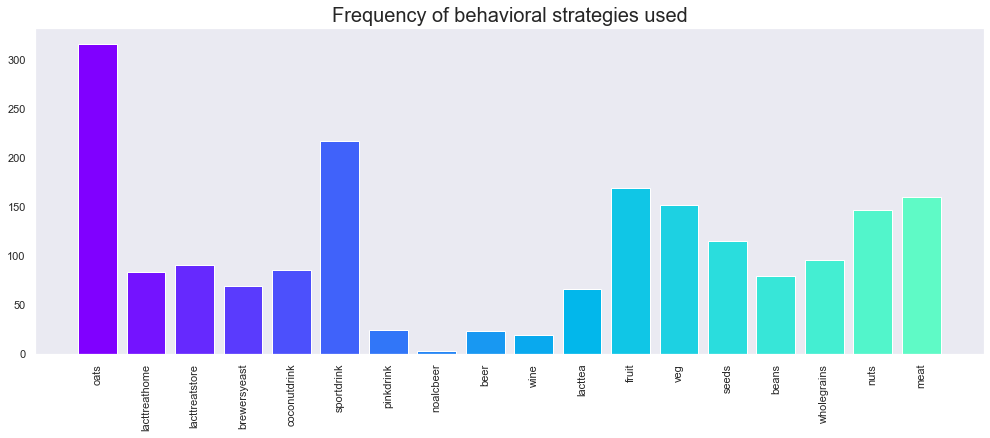

In [33]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(galac_items_df.columns, galac_items_counts_new,color = color)
plt.title('Frequency of behavioral strategies used', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [34]:
support_new = galac_items_df.mean()
support_new = pd.DataFrame(support_new, columns=['support']).sort_values('support',ascending=False)

# Print the support
support_new

,support
oats,0.262635
sportdrink,0.180613
fruit,0.140845
meat,0.132560
veg,0.125932
nuts,0.121790
seeds,0.096106
wholegrains,0.079536
lacttreatstore,0.075394
coconutdrink,0.071251


In [35]:
frequent_itemsets = apriori(galac_items_df, min_support= 0.05, use_colnames=True, max_len = 4)
rules_2 = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Dropping rules that have same lift.

In [36]:
rules_2.drop_duplicates(subset="lift",keep=False, inplace=True)

To identify our best rules, we will want to execute the following filters.

1. A conviction over 1
2. A leverage over 0
3. A confidence greater than a consequent’s support
4. A Lift over 1

All of these metrics imply a high association that if someone is going to buy our first product ( the antecedent ), they will consume the next product as well ( the consequent ). 

In [37]:
rules_2 = rules_2[(rules_2['conviction']> 1) & (rules_2['leverage']>0 & (rules_2['confidence']> rules_2['consequent support']) )]

In [39]:
display(rules_2.sort_values(by ='support', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(sportdrink),(oats),0.180613,0.262635,0.121790,0.674312,2.567491,0.074354,2.264023
5,(fruit),(oats),0.140845,0.262635,0.102734,0.729412,2.777287,0.065743,2.725046
19,(meat),(fruit),0.132560,0.140845,0.101077,0.762500,5.413750,0.082407,3.617494
20,(fruit),(meat),0.140845,0.132560,0.101077,0.717647,5.413750,0.082407,3.072183
10,(nuts),(oats),0.121790,0.262635,0.095278,0.782313,2.978712,0.063291,3.387272
27,(veg),(meat),0.125932,0.132560,0.092792,0.736842,5.558553,0.076098,3.296272
26,(meat),(veg),0.132560,0.125932,0.092792,0.700000,5.558553,0.076098,2.913560
11,(meat),(oats),0.132560,0.262635,0.090307,0.681250,2.593908,0.055492,2.313303
6,(veg),(oats),0.125932,0.262635,0.086993,0.690789,2.630230,0.053918,2.384671
7,(seeds),(oats),0.096106,0.262635,0.081193,0.844828,3.216741,0.055952,4.751910


Rules identified:  80


# Rules for Supplements

In [16]:
column_names = ['ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle']
df['supplements_sum']= df[column_names].sum(axis=1)

In [42]:
print("Mean: ",df['supplements_sum'].mean(), "Median: ",df['supplements_sum'].median())

Mean:  0.15410107705053852 Median:  0.0


Taking only those rows which has atleast one product consumed by the user.

In [43]:
supplements_df = df[df['supplements_sum'] != 0]

In [44]:
from scipy.stats import describe
describe(supplements_df['supplements_sum'], axis=0)

DescribeResult(nobs=120, minmax=(1.0, 6.0), mean=1.55, variance=1.257983193277311, skewness=2.422395853893767, kurtosis=5.654571668386877)

Skewness essentially measures the symmetry of the distribution. The skewness value of 2.42 suggests that the data is positive skewed. 

And the distribution has a negative kurtosis value of 5.65. This indicates that the distribution has lighter tails than the normal distribution.

In [45]:
supplements_df['supplements_sum'].median()

1.0

In [46]:
supplements_df = df[column_names]
supplements_df.head(10)

,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [47]:
supp_counts_new = []
for i in supplements_df.columns:
    supp_counts_new.append(( supplements_df[i] == True).sum())
#beh_strategies_counts_new.sort(reverse = True)

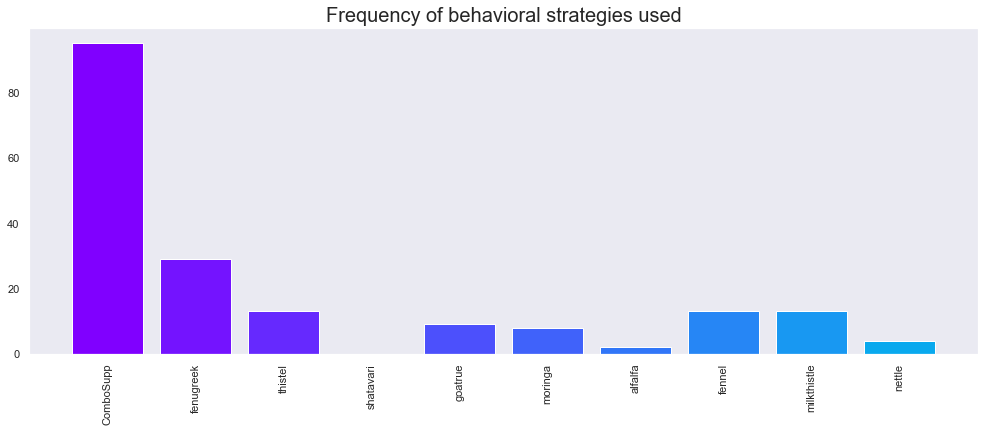

In [48]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(supplements_df.columns, supp_counts_new,color = color)
plt.title('Frequency of behavioral strategies used', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [49]:
support_new = supplements_df.mean()
support_new = pd.DataFrame(support_new, columns=['support']).sort_values('support',ascending=False)

# Print the support
support_new

,support
ComboSupp,0.078708
fenugreek,0.024027
thistel,0.010771
fennel,0.010771
milkthistle,0.010771
goatrue,0.007457
moringa,0.006628
nettle,0.003314
alfalfa,0.001657
shatavari,0.000000


In [50]:
frequent_itemsets = apriori(supplements_df, min_support= 0.005, use_colnames=True, max_len = 2)
rules_2 = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
display(rules_2.sort_values(by ='confidence', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(thistel),(ComboSupp),0.010771,0.078708,0.0058,0.538462,6.841296,0.004952,1.996134
1,(fennel),(ComboSupp),0.010771,0.078708,0.0058,0.538462,6.841296,0.004952,1.996134
2,(milkthistle),(ComboSupp),0.010771,0.078708,0.0058,0.538462,6.841296,0.004952,1.996134
3,(thistel),(fenugreek),0.010771,0.024027,0.0058,0.538462,22.411141,0.005541,2.114609
4,(fennel),(fenugreek),0.010771,0.024027,0.0058,0.538462,22.411141,0.005541,2.114609
5,(thistel),(fennel),0.010771,0.010771,0.0058,0.538462,49.994083,0.005683,2.143331
6,(fennel),(thistel),0.010771,0.010771,0.0058,0.538462,49.994083,0.005683,2.143331
7,(thistel),(milkthistle),0.010771,0.010771,0.0058,0.538462,49.994083,0.005683,2.143331
8,(milkthistle),(thistel),0.010771,0.010771,0.0058,0.538462,49.994083,0.005683,2.143331


Rules identified:  9


# Creating Rules after combining Food and Supplements 

In [18]:
column_names = ['oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat','ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle']
df['food_and_supp_sum'] = df[column_names].sum(axis=1)

In [19]:
df.head(10)

,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app,galac_items_sum,supplements_sum,food_and_supp_sum
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,1.0,0.0,0,1,0,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0.0,0.0,1.0,1.0,0.0,11.0,0.0,11.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,1,0.0,0.0,0.0,1.0,0.0,7.0,1.0,8.0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
food_supp_df = df[df['food_and_supp_sum'] != 0.0]

In [26]:
len(food_supp_df)

494

In [23]:
print("Mean: ",food_supp_df['food_and_supp_sum'].mean(), "Median: ",food_supp_df['food_and_supp_sum'].median())

Mean:  4.275303643724697 Median:  3.0


In [30]:
from scipy.stats import describe
describe(food_supp_df['food_and_supp_sum'], axis=0)

DescribeResult(nobs=494, minmax=(1.0, 19.0), mean=4.275303643724697, variance=10.037644430940041, skewness=1.092091192993613, kurtosis=1.0066095107141777)

Taking only the columns having food items and supplements

In [32]:
food_supp_df = food_supp_df[column_names]
food_supp_df.head(10)

,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
18,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
30,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
36,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
41,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [37]:
food_supp_counts = []
for i in food_supp_df.columns:
    food_supp_counts.append(( food_supp_df[i] == True).sum())

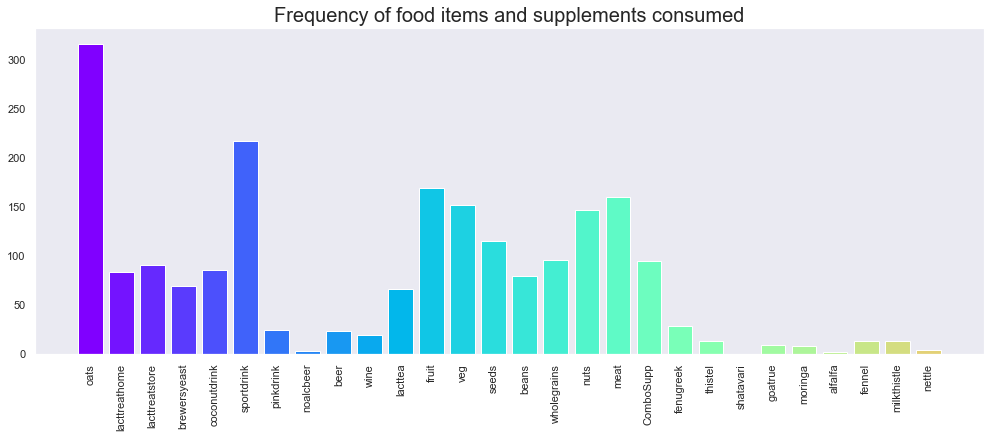

In [39]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(food_supp_df.columns, food_supp_counts,color = color)
plt.title('Frequency of food items and supplements consumed', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Calculating the support of the galactagogues

In [40]:
support = food_supp_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
oats,0.641700
sportdrink,0.441296
fruit,0.344130
meat,0.323887
veg,0.307692
nuts,0.297571
seeds,0.234818
wholegrains,0.194332
ComboSupp,0.192308
lacttreatstore,0.184211


Since the mean was 4.72 ~ 5, so we will set the maximum length of rules as 5.

In [44]:
frequent_itemsets = apriori(food_supp_df, min_support= 0.01, use_colnames=True, max_len = 5)
rules_2 = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


To identify our best rules, we will want to execute the following filters.

1. A conviction over 1
2. A leverage over 0
3. A confidence greater than a consequent’s support
4. A Lift over 1

All of these metrics imply a high association that if someone is going to buy our first product ( the antecedent ), they will consume the next product as well ( the consequent ). 

In [47]:
rules_2 = rules_2[(rules_2['conviction']> 1) & (rules_2['leverage']>0 & (rules_2['confidence']> rules_2['consequent support']) )]

In [48]:
display(rules_2.sort_values(by ='confidence', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4330,"(brewersyeast, beans, fruit)",(seeds),0.032389,0.234818,0.032389,1.0,4.258621,0.024783,inf
1673,"(brewersyeast, nuts, lacttea)",(oats),0.016194,0.641700,0.016194,1.0,1.558360,0.005802,inf
13119,"(seeds, nuts, lacttreatstore, wholegrains)",(lacttreathome),0.010121,0.170040,0.010121,1.0,5.880952,0.008400,inf
13110,"(seeds, beans, lacttreatstore, lacttreathome)",(meat),0.010121,0.323887,0.010121,1.0,3.087500,0.006843,inf
13104,"(seeds, beans, lacttreatstore, wholegrains)",(lacttreathome),0.010121,0.170040,0.010121,1.0,5.880952,0.008400,inf
1859,"(coconutdrink, fruit, beans)",(oats),0.036437,0.641700,0.036437,1.0,1.558360,0.013055,inf
13102,"(seeds, beans, lacttreatstore, lacttreathome)",(wholegrains),0.010121,0.194332,0.010121,1.0,5.145833,0.008155,inf
13098,"(meat, nuts, lacttreatstore, lacttreathome)",(veg),0.016194,0.307692,0.016194,1.0,3.250000,0.011211,inf
13087,"(meat, lacttreatstore, wholegrains, lacttreath...",(veg),0.018219,0.307692,0.018219,1.0,3.250000,0.012613,inf
7483,"(seeds, beans, oats, lacttreathome)",(veg),0.030364,0.307692,0.030364,1.0,3.250000,0.021021,inf


Rules identified:  20257


In [49]:
display(rules_2.sort_values(by ='support', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(sportdrink),(oats),0.441296,0.641700,0.297571,0.674312,1.050820,0.014391,1.100131
36,(veg),(fruit),0.307692,0.344130,0.253036,0.822368,2.389706,0.147150,3.692308
37,(fruit),(veg),0.344130,0.307692,0.253036,0.735294,2.389706,0.147150,2.615385
9,(fruit),(oats),0.344130,0.641700,0.251012,0.729412,1.136686,0.030184,1.324151
44,(fruit),(meat),0.344130,0.323887,0.246964,0.717647,2.215735,0.135505,2.394568
43,(meat),(fruit),0.323887,0.344130,0.246964,0.762500,2.215735,0.135505,2.761560
14,(nuts),(oats),0.297571,0.641700,0.232794,0.782313,1.219125,0.041842,1.645939
55,(veg),(meat),0.307692,0.323887,0.226721,0.736842,2.275000,0.127063,2.569231
54,(meat),(veg),0.323887,0.307692,0.226721,0.700000,2.275000,0.127063,2.307692
15,(meat),(oats),0.323887,0.641700,0.220648,0.681250,1.061632,0.012810,1.124077


Rules identified:  20257


__Network for representing the top 10 rules__

<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_10216/710546070.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


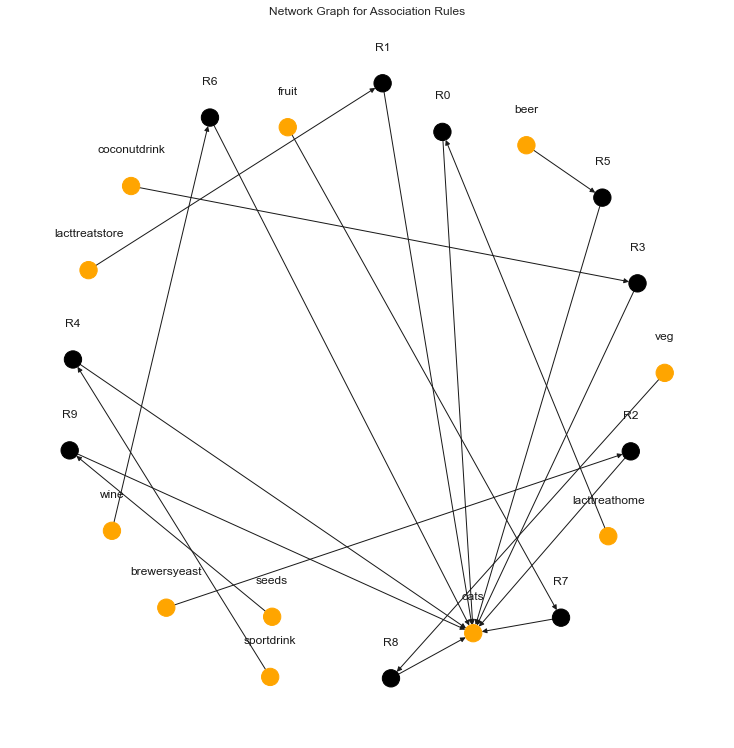

In [51]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules_2, 10)